## Setup

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

import torch
import torch.nn as nn
import torchvision.transforms as transforms

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [118]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Question 2

In [119]:
# Hyper-parameters 
input_size = 3*32*32 
num_classes = 100
num_epochs = 10
batch_size = 100
learning_rate = 0.001

In [120]:
import cifardataset

In [121]:
train_dataset = cifardataset.CIFAR100(root='./data2', 
                                           coarse=True,
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = cifardataset.CIFAR100(root='./data2', 
                                          coarse=True,
                                          train=False, 
                                          transform=transforms.ToTensor())

Files already downloaded and verified


In [122]:
train_dataset_9 = [i for i in train_dataset if i[2] == 9]
test_dataset_9 = [i for i in test_dataset if i[2] == 9]

In [123]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset_9, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset_9, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [124]:
class Model(nn.Module):
    def __init__(self, input_size):
        super(Model, self).__init__() #calls nn.Module init()
        #self.linear = nn.Linear (input_size, num_classes)
        #Z = WtX + b
        #input_size is the shape of X
        #num_classes is the shape of Z
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, num_classes),
            nn.ReLU(),
            nn.Linear(100,50),
            nn.ReLU(),
            nn.Linear(50,5),
            nn.Softmax()
        )
        

    def forward(self, x):
        out = self.layers(x)
        return out

model = Model(input_size)


In [125]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [126]:
# Train the model
n_total_steps = len(train_loader)
figure = []

for epoch in range(num_epochs):
    for i, (images, labels, coarse_label) in enumerate(train_loader):  
        epochVec = []
        epochLoss = []

        print ('h')
        images = images.reshape(-1, 3*32*32).to(device)
        labels = labels.to(device)
        labels[labels == 12] = 0
        labels[labels == 17] = 1
        labels[labels == 37] = 2
        labels[labels == 68] = 3
        labels[labels == 76] = 4
        
        # Forward pass
        outputs = model(images)
        loss = criterion (outputs, labels)
        epochLoss.append(loss.item())
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() #.step = update rule we rote 
        
        print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
    
    epochAvg = sum(epochLoss)/len(epochLoss)
    epochVec = [(epoch + 1), epochAvg]
    figure.append(epochVec)


    
    
    



h
Epoch [1/10], Step [1/25], Loss: 1.6093
h
Epoch [1/10], Step [2/25], Loss: 1.6024
h
Epoch [1/10], Step [3/25], Loss: 1.6364
h
Epoch [1/10], Step [4/25], Loss: 1.5878
h
Epoch [1/10], Step [5/25], Loss: 1.6098
h
Epoch [1/10], Step [6/25], Loss: 1.5908
h
Epoch [1/10], Step [7/25], Loss: 1.6142
h
Epoch [1/10], Step [8/25], Loss: 1.5827
h
Epoch [1/10], Step [9/25], Loss: 1.5807
h
Epoch [1/10], Step [10/25], Loss: 1.5968
h
Epoch [1/10], Step [11/25], Loss: 1.5691
h
Epoch [1/10], Step [12/25], Loss: 1.5782
h
Epoch [1/10], Step [13/25], Loss: 1.5940
h
Epoch [1/10], Step [14/25], Loss: 1.5477
h
Epoch [1/10], Step [15/25], Loss: 1.5490
h
Epoch [1/10], Step [16/25], Loss: 1.5117
h
Epoch [1/10], Step [17/25], Loss: 1.6047
h
Epoch [1/10], Step [18/25], Loss: 1.5890
h
Epoch [1/10], Step [19/25], Loss: 1.5253
h
Epoch [1/10], Step [20/25], Loss: 1.5540
h
Epoch [1/10], Step [21/25], Loss: 1.5614
h
Epoch [1/10], Step [22/25], Loss: 1.5314
h
Epoch [1/10], Step [23/25], Loss: 1.5194
h
Epoch [1/10], Step

### 2.1

In [127]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels, coarse_label in test_loader:
        images = images.reshape(-1, 3*32*32).to(device)
        labels = labels.to(device)
        labels[labels == 12] = 0
        labels[labels == 17] = 1
        labels[labels == 37] = 2
        labels[labels == 68] = 3
        labels[labels == 76] = 4
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1) # max returns (value ,index)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    confusion = confusion_matrix(labels,predicted, labels=[0,1])
    tp = confusion[1][1]
    fp = confusion[0][1]
    fn = confusion[1][0]
    tn = confusion[0][0]
    print(confusion)
    precision = tp/(tp+fp) *100
    

    print(f'Precision for the 500 test images: {precision} %')
    print(f'Accuracy for the 500 test images: {acc} %')

[[7 1]
 [4 8]]
Precision for the 500 test images: 88.88888888888889 %
Accuracy for the 500 test images: 49.0 %


### 2.2

In [128]:
figure = np.array(figure)
figure = figure.transpose()
figure

array([[ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ,
         6.        ,  7.        ,  8.        ,  9.        , 10.        ],
       [ 1.53806591,  1.50998199,  1.4316467 ,  1.50850403,  1.43372416,
         1.33828843,  1.41584611,  1.33598125,  1.4023    ,  1.38846576]])

(0.0, 10.0)

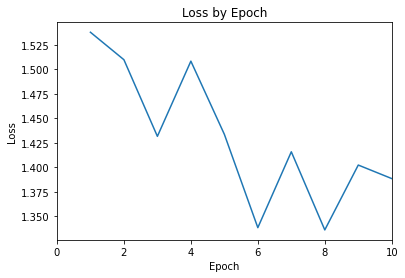

In [129]:
fig, ax = plt.subplots()

ax.plot(figure[0], figure[1])
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("Loss by Epoch")
plt.xlim([0,10])

## Question 3

In [130]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [131]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [132]:
# Hyper-parameters 
num_classes = 100
num_epochs = 10
batch_size = 4 #mini-batch gradient descent
learning_rate = 0.001

In [133]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [134]:
import cifardataset

In [135]:
train_dataset = cifardataset.CIFAR100(root='./data2', 
                                           coarse=True,
                                           train=True, 
                                           transform=transform,  
                                           download=True)

test_dataset = cifardataset.CIFAR100(root='./data2', 
                                          coarse=True,
                                          train=False, 
                                          transform=transform)


Files already downloaded and verified


In [136]:
train_dataset_9 = [i for i in train_dataset if i[2] == 9]
test_dataset_9 = [i for i in test_dataset if i[2] == 9]

In [137]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset_9, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset_9, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [138]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3,8,5) #(in-channels, out-channels, kernel size)
        self.fc1 = nn.Linear(8*28*28,1080) #calclate 8*28*28 on own, 8 filters, result = same as example 
        self.fc2 = nn.Linear(1080,100)
        

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = x.view(-1, 8*28*28) #tensor operation of reshape (-1, N)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

### 3.1

In [139]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(100)]
    n_class_samples = [0 for i in range(100)]
    for images, labels, coarse_label in test_loader:
        images = images.to(device)
        
        labels = labels.to(device)
        labels[labels == 12] = 0
        labels[labels == 17] = 1
        labels[labels == 37] = 2
        labels[labels == 68] = 3
        labels[labels == 76] = 4
        outputs = model(images)
       
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    
    acc = 100.0 * n_correct / n_samples

    for i in range(100):
        if n_class_samples[i] == 0:
            print(f'Accuracy of {[i]}: 0 %')
        else:
            acc = 100.0 * n_class_correct[i] / n_class_samples[i]
            print(f'Accuracy of {[i]}: {acc} %')

Accuracy of [0]: 17.0 %
Accuracy of [1]: 88.0 %
Accuracy of [2]: 13.0 %
Accuracy of [3]: 63.0 %
Accuracy of [4]: 65.0 %
Accuracy of [5]: 0 %
Accuracy of [6]: 0 %
Accuracy of [7]: 0 %
Accuracy of [8]: 0 %
Accuracy of [9]: 0 %
Accuracy of [10]: 0 %
Accuracy of [11]: 0 %
Accuracy of [12]: 0 %
Accuracy of [13]: 0 %
Accuracy of [14]: 0 %
Accuracy of [15]: 0 %
Accuracy of [16]: 0 %
Accuracy of [17]: 0 %
Accuracy of [18]: 0 %
Accuracy of [19]: 0 %
Accuracy of [20]: 0 %
Accuracy of [21]: 0 %
Accuracy of [22]: 0 %
Accuracy of [23]: 0 %
Accuracy of [24]: 0 %
Accuracy of [25]: 0 %
Accuracy of [26]: 0 %
Accuracy of [27]: 0 %
Accuracy of [28]: 0 %
Accuracy of [29]: 0 %
Accuracy of [30]: 0 %
Accuracy of [31]: 0 %
Accuracy of [32]: 0 %
Accuracy of [33]: 0 %
Accuracy of [34]: 0 %
Accuracy of [35]: 0 %
Accuracy of [36]: 0 %
Accuracy of [37]: 0 %
Accuracy of [38]: 0 %
Accuracy of [39]: 0 %
Accuracy of [40]: 0 %
Accuracy of [41]: 0 %
Accuracy of [42]: 0 %
Accuracy of [43]: 0 %
Accuracy of [44]: 0 %
Accur

C:\Users\jusxp\anaconda3\envs\498A\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


### 3.2

In [140]:
n_total_steps = len(train_loader)
figure_2 = []
for epoch in range(num_epochs):
    for batch_idx, (images, labels, coarse_label) in enumerate(train_loader):
            epochVec_2 = []
            epochLoss_2 = []
            
            labels[labels == 12] = 0
            labels[labels == 17] = 1
            labels[labels == 37] = 2
            labels[labels == 68] = 3
            labels[labels == 76] = 4
            
            #forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            epochLoss_2.append(loss.item())
        

            #backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{n_total_steps}], Loss: {loss.item():.4f}')

    epochAvg_2 = sum(epochLoss_2)/len(epochLoss_2)
    epochVec = [(epoch + 1), epochAvg_2]
    figure_2.append(epochVec)


Epoch [1/10], Step [1/625], Loss: 1.2585
Epoch [1/10], Step [2/625], Loss: 1.3845
Epoch [1/10], Step [3/625], Loss: 1.5617
Epoch [1/10], Step [4/625], Loss: 1.4248
Epoch [1/10], Step [5/625], Loss: 1.3952
Epoch [1/10], Step [6/625], Loss: 1.3974
Epoch [1/10], Step [7/625], Loss: 1.5509
Epoch [1/10], Step [8/625], Loss: 1.4012
Epoch [1/10], Step [9/625], Loss: 1.4590
Epoch [1/10], Step [10/625], Loss: 1.4244
Epoch [1/10], Step [11/625], Loss: 1.6425
Epoch [1/10], Step [12/625], Loss: 1.2308
Epoch [1/10], Step [13/625], Loss: 1.1951
Epoch [1/10], Step [14/625], Loss: 1.4864
Epoch [1/10], Step [15/625], Loss: 1.3732
Epoch [1/10], Step [16/625], Loss: 1.2859
Epoch [1/10], Step [17/625], Loss: 1.1547
Epoch [1/10], Step [18/625], Loss: 1.6423
Epoch [1/10], Step [19/625], Loss: 1.3223
Epoch [1/10], Step [20/625], Loss: 1.8866
Epoch [1/10], Step [21/625], Loss: 1.7468
Epoch [1/10], Step [22/625], Loss: 1.8008
Epoch [1/10], Step [23/625], Loss: 1.1661
Epoch [1/10], Step [24/625], Loss: 1.1446
E

In [141]:
figure_2 = np.array(figure_2)
figure_2 = figure_2.transpose()
figure_2

array([[ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ,
         6.        ,  7.        ,  8.        ,  9.        , 10.        ],
       [ 1.15502894,  1.39703345,  1.26968288,  1.39878702,  1.40819848,
         1.02916515,  1.40441942,  1.15648746,  0.93025935,  0.90533125]])

(0.0, 10.0)

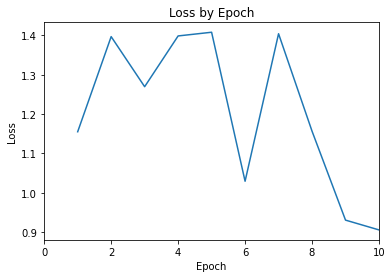

In [142]:
fig, ax_2 = plt.subplots()

ax_2.plot(figure_2[0], figure_2[1])
ax_2.set_xlabel("Epoch")
ax_2.set_ylabel("Loss")
ax_2.set_title("Loss by Epoch")
plt.xlim([0,10])